In [1]:
%matplotlib inline
import yt
import yt.units as unit
import matplotlib.pyplot as plt
from yt.analysis_modules.halo_analysis.api import *
import corr2

/Users/Oleg/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.4-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path='/Users/Oleg/Rockstar/'   ##Put here the directory where to find the file

In [4]:
ds1=yt.GadgetDataset(path+"snapshot_100")   ##Add name of file

yt : [INFO     ] 2017-05-28 21:26:59,304 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-05-28 21:26:59,305 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-05-28 21:26:59,336 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2017-05-28 21:26:59,337 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-05-28 21:26:59,340 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-05-28 21:26:59,341 Parameters: domain_right_edge         = [ 50000.  50000.  50000.]
yt : [INFO     ] 2017-05-28 21:26:59,343 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-05-28 21:26:59,345 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-05-28 21:26:59,346 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-05-28 21:26:59,347 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-05-28 21:26:59,349 Parameters: hubble_constant           = 0.7


In [5]:
p1 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')

yt : [INFO     ] 2017-05-28 21:26:59,366 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-05-28 21:26:59,691 Identified 1.469e+05 octs
yt : [INFO     ] 2017-05-28 21:27:00,184 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:00,184 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:00,186 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:00,187 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:00,189 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



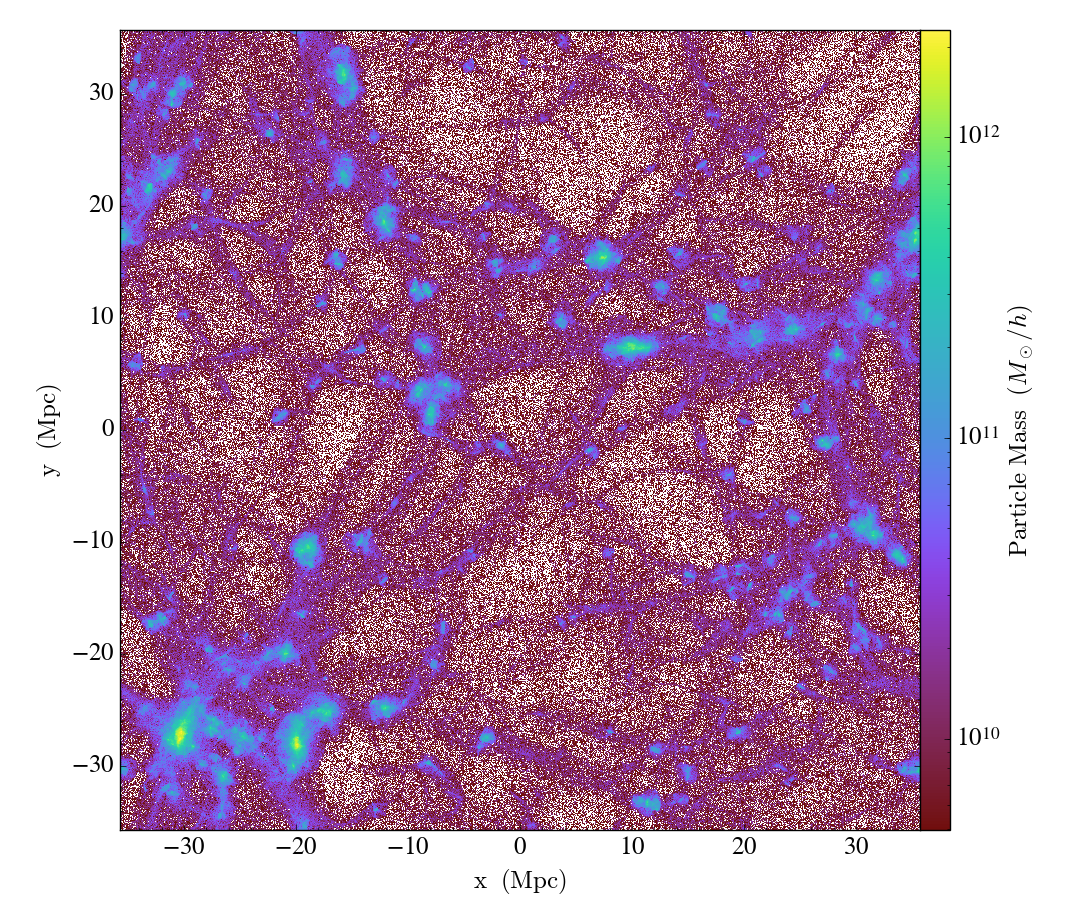

In [6]:
p1.set_axes_unit('Mpc')
p1.set_unit('particle_mass', 'Msun/h')


ad_data = ds1.all_data()

p_x = ad_data['particle_position_x'].in_units('Mpc/h')
p_y = ad_data['particle_position_y'].in_units('Mpc/h')
p_z = ad_data['particle_position_z'].in_units('Mpc/h')
pos = np.array([p_x, p_y, p_z]).T
np.savetxt('positions.txt',pos)

box = 50.
n_bin = int(np.sqrt(len(p_x)))

hist = corr2.corr2(pos, int(box), n_bin, model=1)

In [7]:
halos  = yt.load(path+'halos_0.0.bin')

yt : [INFO     ] 2017-05-28 21:27:02,758 Parameters: current_time              = 4.24986071675e+17 s
yt : [INFO     ] 2017-05-28 21:27:02,759 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-05-28 21:27:02,761 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-05-28 21:27:02,762 Parameters: domain_right_edge         = [ 50.  50.  50.]
yt : [INFO     ] 2017-05-28 21:27:02,764 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-05-28 21:27:02,764 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-05-28 21:27:02,765 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-05-28 21:27:02,766 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-05-28 21:27:02,767 Parameters: hubble_constant           = 0.699999988079


In [8]:
hc = HaloCatalog(halos_ds = halos)
hc.load()

yt : [INFO     ] 2017-05-28 21:27:02,775 Allocating for 3.102e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-05-28 21:27:02,786 Identified 1.433e+03 octs


yt : [INFO     ] 2017-05-28 21:27:04,300 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:04,301 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:04,305 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:04,306 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:04,307 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



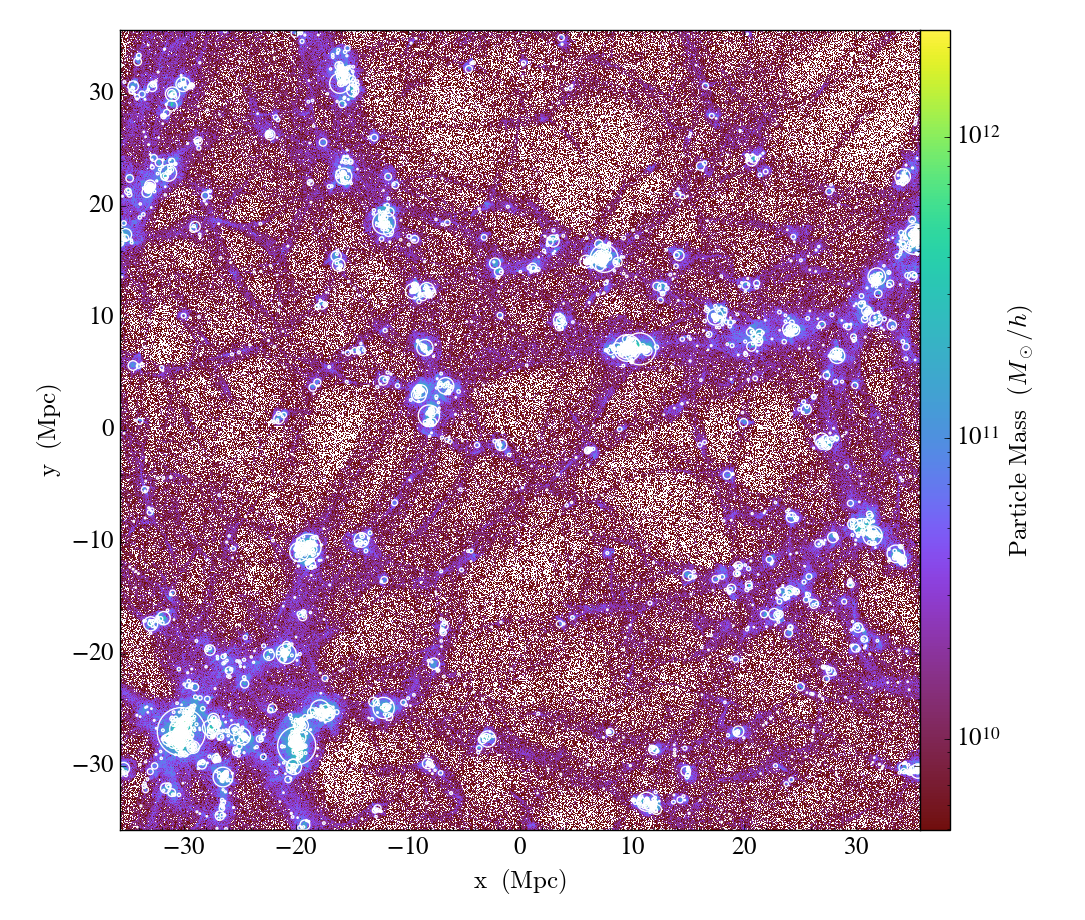

In [9]:
p2 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p2.annotate_halos(hc)
p2.set_axes_unit('Mpc')
p2.set_unit('particle_mass', 'Msun/h')


In [10]:
import tempfile
import shutil
import os

tmpdir = tempfile.mkdtemp()

In [11]:
hc2 = HaloCatalog(data_ds = ds1, halos_ds= halos, 
                  output_dir = os.path.join(tmpdir,'halo_catalog'))

In [12]:
hc2.add_filter("quantity_value","particle_mass",">",1e12,"Msun/h")

In [13]:
hc2.create()

yt : [INFO     ] 2017-05-28 21:27:09,325 Saving halo catalog (280 halos) to /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmp66VLsS/halo_catalog/halo_catalog.
yt : [INFO     ] 2017-05-28 21:27:09,326 Saving field data to yt dataset: /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmp66VLsS/halo_catalog/halo_catalog.0.h5.


In [14]:
halos_ds1 = yt.load(os.path.join(tmpdir,'halo_catalog/halo_catalog.0.h5'))

hc_r = HaloCatalog(halos_ds=halos_ds1, 
                  output_dir=os.path.join(tmpdir,'halo_catalog'))
hc_r.load()

yt : [INFO     ] 2017-05-28 21:27:09,392 Parameters: current_time              = 4.24986071675e+17
yt : [INFO     ] 2017-05-28 21:27:09,393 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-05-28 21:27:09,394 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-05-28 21:27:09,395 Parameters: domain_right_edge         = [  2.20405545e+26   2.20405545e+26   2.20405545e+26]
yt : [INFO     ] 2017-05-28 21:27:09,396 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-05-28 21:27:09,397 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-05-28 21:27:09,398 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-05-28 21:27:09,398 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-05-28 21:27:09,399 Parameters: hubble_constant           = 0.699999988079
yt : [INFO     ] 2017-05-28 21:27:09,404 Allocating for 2.800e+02 particles (index particle type 'all')
yt : [INFO     ] 2017-0

yt : [INFO     ] 2017-05-28 21:27:09,773 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:09,774 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:09,776 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:09,776 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-05-28 21:27:09,778 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



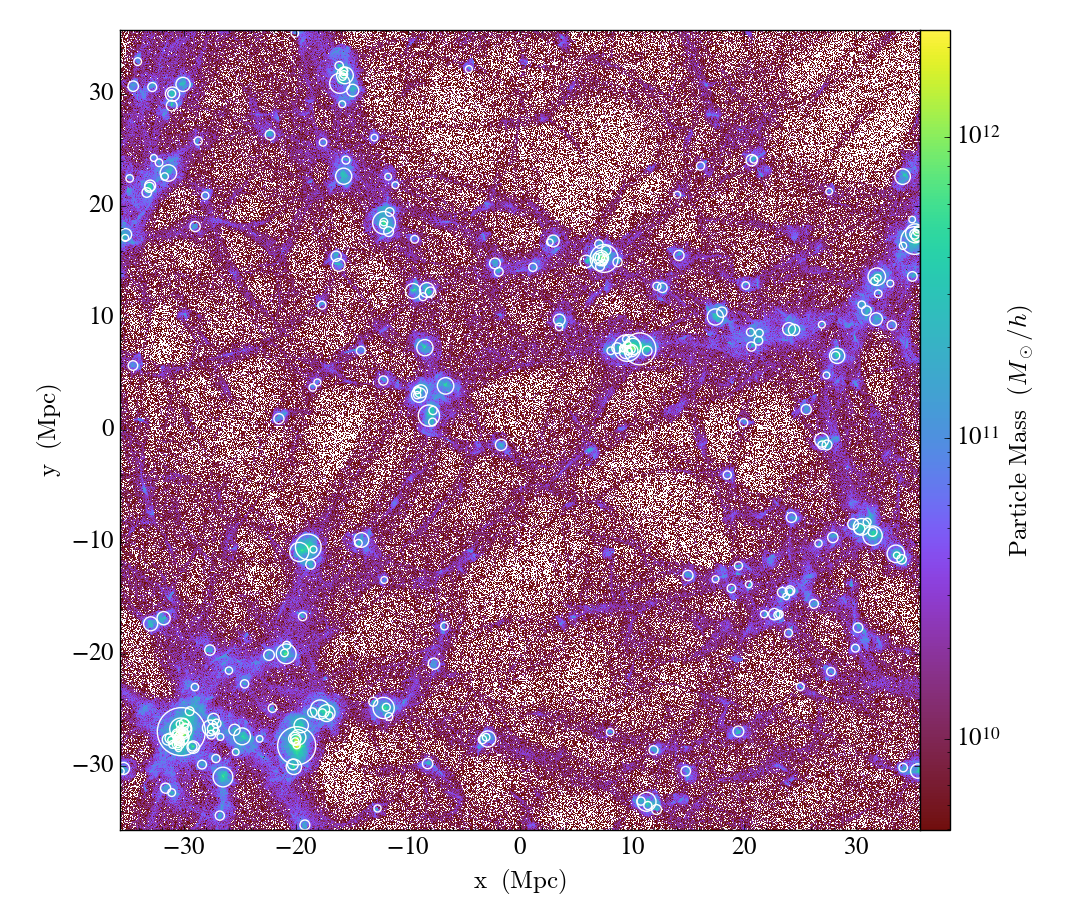

In [15]:
p3 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p3.annotate_halos(hc_r)
p3.set_axes_unit('Mpc')
p3.set_unit('particle_mass', 'Msun/h')


In [16]:
import seaborn as sb
sb.set_style('white')

In [17]:
ad_halos = halos.all_data()

14179944104.3 Msun


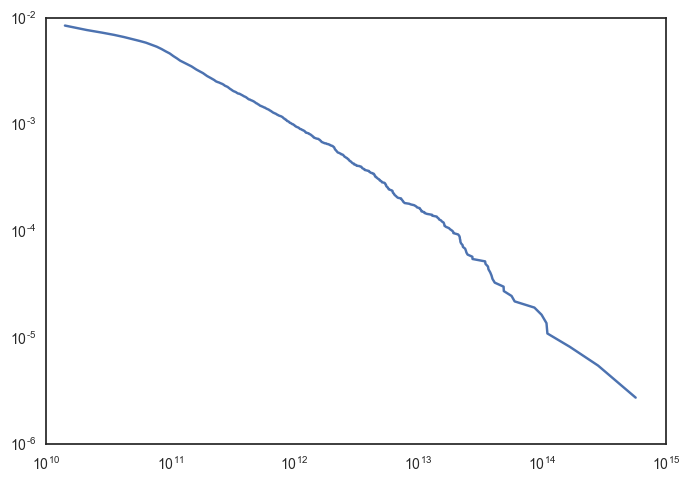

In [18]:
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
print m_halos[0]
vol = (50.0/0.7)**3
n_density = np.arange(len(m_halos),0,-1)

m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
#print n_density
plt.loglog(m_halos,n_density)

In [19]:
print min(m_halos) , max(m_halos)

14179944104.3 Msun 5.68169105733e+14 Msun


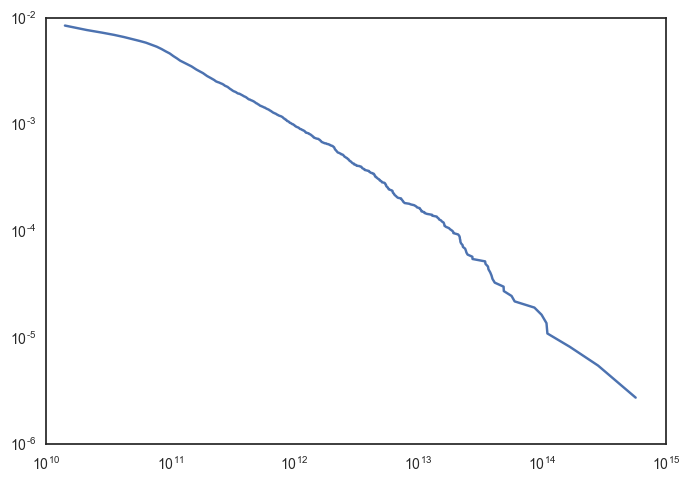

In [20]:
from yt.analysis_modules.halo_mass_function.api import *
hmf = HaloMassFcn(halos_ds=halos,omega_matter0=0.3,omega_lambda0=0.7,hubble0=0.7,log_mass_min=10.,log_mass_max=15., fitting_function=1)

#print hmf.n_cumulative_sim
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

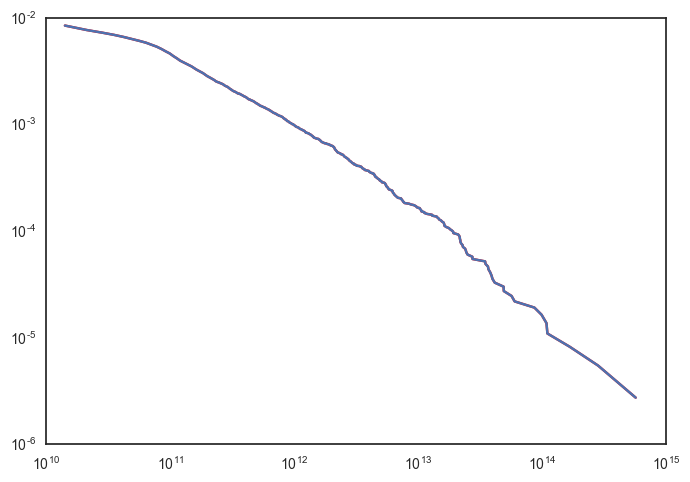

In [21]:
plt.figure()
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

In [22]:
print hmf.n_cumulative_sim.size

429


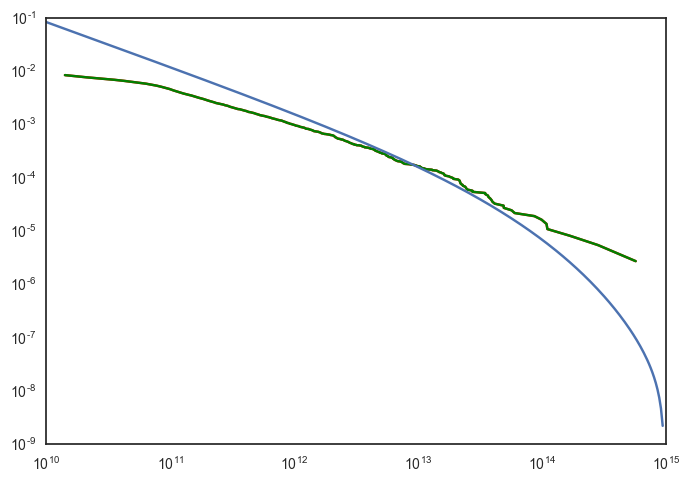

In [23]:
plt.figure()
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
#print m_halos[0]
vol = (50./0.7)**3.
n_density = np.arange(len(m_halos),0,-1)
#print n_density
m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim,'g')
plt.loglog(hmf.masses_analytic, hmf.n_cumulative_analytic)

In [24]:
pos_x = ad_halos["particle_position_x"].in_units("Mpc/h")
pos_y = ad_halos["particle_position_y"].in_units("Mpc/h")
pos_z = ad_halos["particle_position_z"].in_units("Mpc/h")

halos_p = np.array([pos_x, pos_y, pos_z]).T
np.savetxt('halos_p.txt', halos_p)

In [25]:
print pos_x[:5]
D = pow(halos_p[0,:] - halos_p[1:,:],2)
print np.sum(D,axis=0)
print D[0]+D[1]+D[2]

[ 1.07984316  1.31063747  0.06853966  0.21471293  0.35782936] Mpc/h
[ 2136251.72712892  2065328.09872126  2418856.70046793]
[  1.82445111  25.57369402  17.48968664]


In [26]:
box = 50
n_bin = int(np.sqrt(len(pos_x)))

In [27]:
hist_p = corr2.corr2(halos_p, box, 20, model = 1)

In [28]:
pos_d = corr2.binning(box, 20, dim = 3)

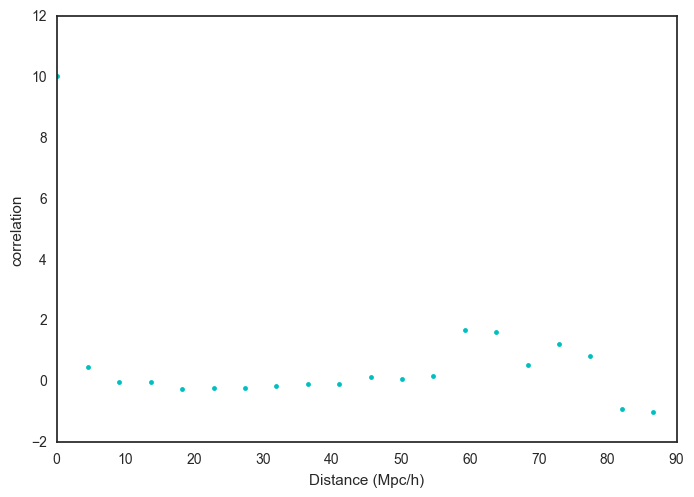

In [29]:
plt.plot(pos_d, hist_p,'.c');
plt.xlabel('Distance (Mpc/h)')
plt.ylabel('correlation')

In [30]:
hist_p2 = corr2.corr2(halos_p, box, 20, model = 0)

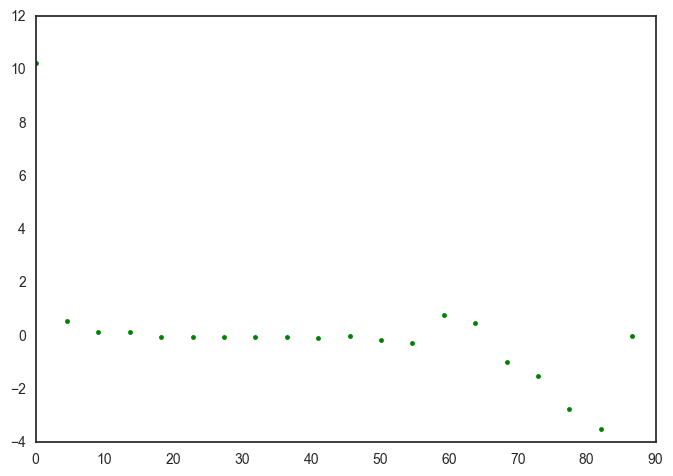

In [31]:
plt.plot(pos_d, hist_p2,'.g');

In [32]:
print hist_p2

[  1.02292254e+01   5.39399970e-01   1.30816144e-01   1.39892345e-01
  -5.72477976e-02  -5.23668543e-02  -6.62270357e-02  -6.46029226e-02
  -3.21639911e-02  -1.00978676e-01   7.41597163e-03  -1.67975419e-01
  -2.70025353e-01   7.92372417e-01   4.66369467e-01  -9.82822881e-01
  -1.49545027e+00  -2.75126050e+00  -3.49152542e+00   0.00000000e+00]


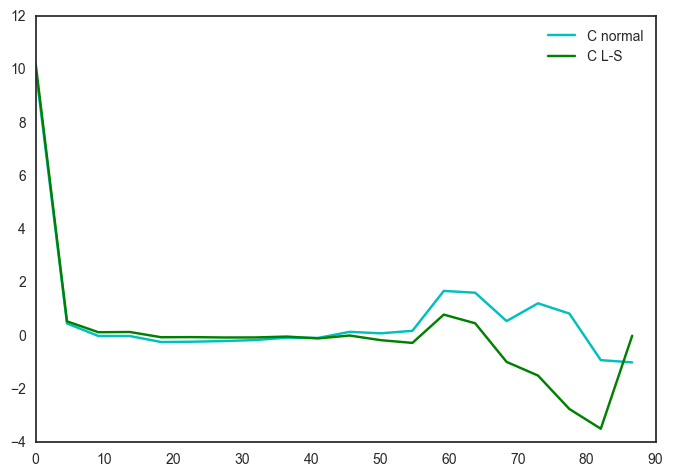

In [33]:
plt.figure()
plt.plot(pos_d,hist_p,'c',label = 'C normal')
plt.plot(pos_d,hist_p2,'g',label = 'C L-S')
plt.legend(loc='best')

In [34]:
randoms_points = np.loadtxt('rand_sample.txt')

In [35]:
print np.shape(randoms_points), np.shape(randoms_points[0,:])

(3, 100000) (100000,)


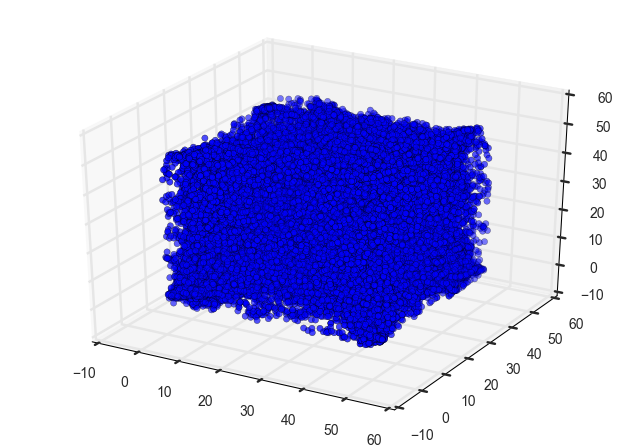

In [36]:
from mpl_toolkits.mplot3d import Axes3D
figure2 = plt.figure()
ax = figure2.add_subplot(111, projection='3d')
ax.scatter(randoms_points[0,:],randoms_points[1,:],randoms_points[2,:]);

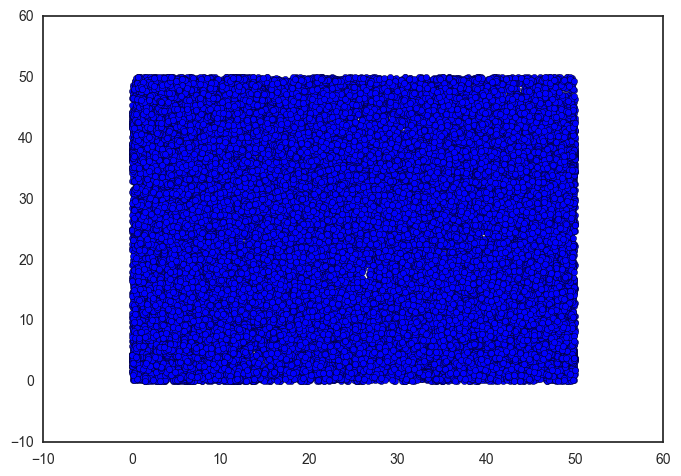

In [37]:
plt.scatter(randoms_points[0,:],randoms_points[1,:])

In [38]:
hist_sim = np.loadtxt('corr_funct.txt')

In [39]:
print np.shape(hist_sim)

(25,)


In [40]:
pos_d2 = corr2.binning(box, 25, dim = 3)

In [41]:
r21 = pos_d2**2

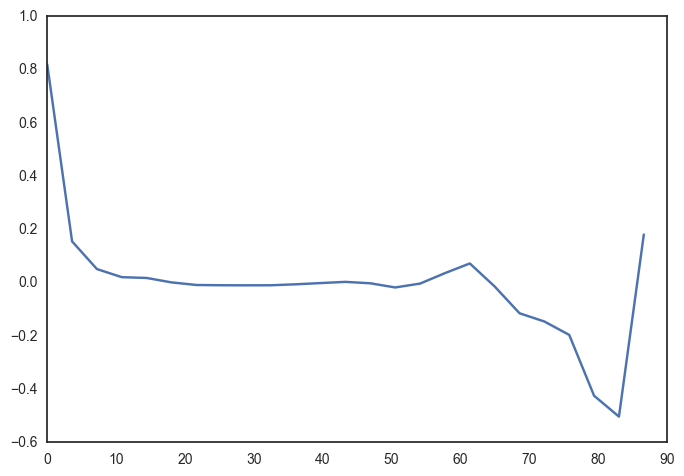

In [42]:
plt.plot(pos_d2, hist_sim)

In [43]:
data_real = np.loadtxt('results_corr.txt')

In [44]:
print np.shape(data_real)

(520,)


In [61]:
pos_d3 = corr2.binning(2617., 520, dim = 3)

In [62]:
r2 = (pos_d3)**2

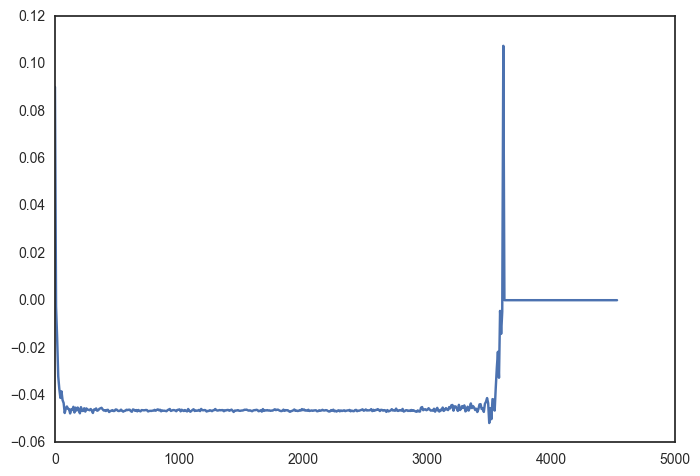

In [63]:
plt.plot(pos_d3,data_real);

In [52]:
data_pos = np.loadtxt('Data.txt')

In [53]:
print np.shape(data_pos)

(3, 105831)


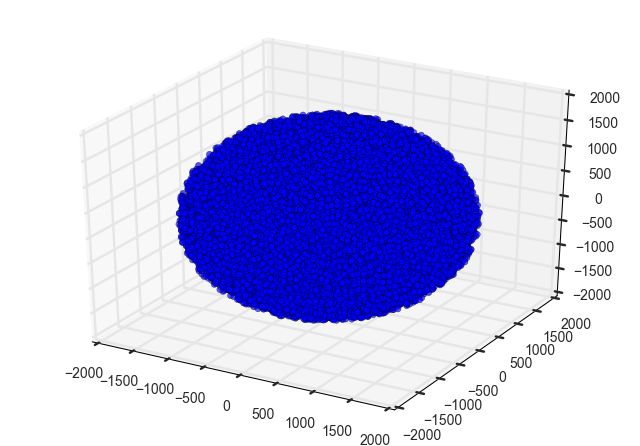

In [54]:
figure3 = plt.figure()
ax = figure3.add_subplot(111, projection='3d')
ax.scatter(data_pos[0,:],data_pos[1,:],data_pos[2,:]);

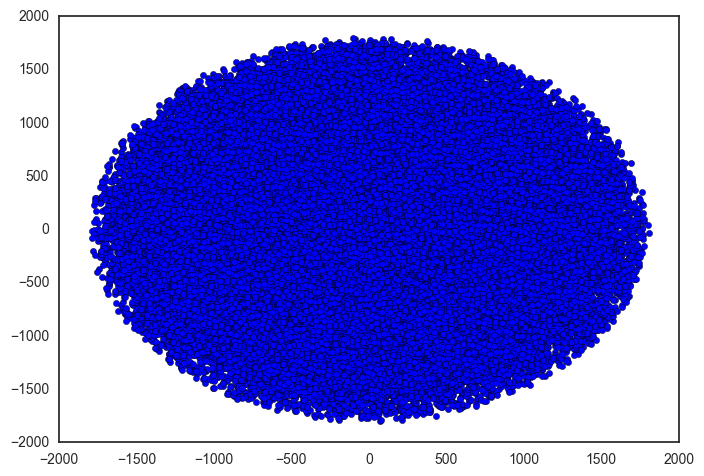

In [57]:
plt.scatter(data_pos[0,:],data_pos[1,:]);

In [64]:
print min(data_pos[0,:]), max(data_pos[0,:])
print min(data_pos[1,:]), max(data_pos[1,:])

-1786.35129858 1805.46387682
-1796.05716738 1794.24087971


In [65]:
distance = max(data_pos[0,:]) - min(data_pos[0,:])


In [66]:
max(data_pos[1,:]) - min(data_pos[1,:])

3590.2980470844441

In [67]:
print distance/np.sqrt(3.0)

2073.7354584
